<img src="files/Pics/LOGOS.png" width="800">

# Labor 09 - Support Vektor Machine (SVM)

Klasszifikációs problémák esetén a Support Vector Machine (SMV) egy jó megoldás lehet. Az SVM segítségével lineárisan szeparálható adathalmaz esetén megtalálhatjuk azt adatokat a lehető legszélesebb határral elválasztó egyenest.

Két lineárisan szeparálható claster esetén végtelen sok lineáris határ létezik. Ezek közül szeretnénk azt kiválasztani, amelyik mindkét claster pontjaitól a legtávolabb húzódik.

<img src="files/Pics/L09_SVMexample.png" width="400">

A két osztályunk kékkel és pirossal jelölve. A folytonos fekete vonal a döntési határunk. A kiemelt pontok képezik a támogató vektorokat (support vector). A távolság a kiemelt pontok és az elválasztó határ között az összes lehetséges variáció közül ebben az esetben maximális. 

A L03 laborhoz visszatérve az nagyából annyit jelent, hogy a sigmoid függvényünk bevezetésénél nem csupán egy éles elválasztóhatárt szeretnénk definiálni, hanem egy egész sávot.

$ h_w(x) = \frac{1}{1+e^{-XW}} $ <br>

$ h_w(x) = g(XW)$

$ h_w(x) = g(z)$

Ha $y=1$ azt akarjuk, hogy $z\geq1$ legyen.<br>
Ha $y=1$ azt akarjuk, hogy $z\leq-1$ legyen.

<img src="files/Pics/L09_SVMsigmoid.png" width="350">

A költség függvényt az alábbi formában definiáltuk:

$ C(w) = \frac{1}{m} \sum{-y^i\cdot\log(h_w(x^i))-(1-y^i)\cdot\log(1-h_w(x^i))} $

, ahol <br>

$ h_w(x) = \frac{1}{1+e^{-z}} $

<img src="files/Pics/L09_newcost.png" width="550">

Vezessünk be két új függvényt: $cost_{1}(z)$ és $cost_{0}(z)$ <br>
vagyis a kitűzött határok 1 és -1. 

A költség függvény minimalizálása továbbra is a feladatunk, amely az alábbiak szerint módosult:

$min_w\ \frac{1}{m} \Big[ \sum_{i=1}^m y^{(i)}\cdot \big(-log(h_w(x^{(i)})+(1-y^{(i)})\big)\cdot \big(-log(1-h_w(x^{(i)}))\big)\Big] +\frac{\lambda}{2m}\sum_{j=1}^nw_j^2 $

$ min_w\ {\color{red} C} \Big[ \sum_{i=1}^m y^{(i)}\cdot \color{red} {cost_1}(h_w(x^{(i)})+(1-y^{(i)})\big)\cdot\color{red} {cost_0}(1-h_w(x^{(i)}))\big)\Big] +\frac{1}{2}\sum_{j=1}^nw_j^2$

, ahol $C = 1/\lambda$ <br>
<font color='red'>[FIGYELEM! A képleten belüli C nem azonos a költség függvény jelölésére használt $C(w)$ -vel]. A jelölést a python kódban használt szintaktika miatt használjuk. </font>

A korábban az L03-L04 laborokban látott bevezetés alapján ezen megfontolássok segítségével tehát az SVM módszer kiterjeszthető a nem lineárisan szeparálható osztályozási feladatokra is.

<img src="files/Pics/L09_SVMtransfer.png" width="550">

## Elméleti összefoglalás

A kölönböző klasszifikációs problémák legbiztonségosabb határának megtalálásához egy jó módszer az SVM. Alap koncepcióját tekintve lineárisan szeparálható feladatok megoldására alkalmas, viszont különböző kernelek segítségével gyakorlatilag tetszőleges feladatok megoldására alkalmassá tehető.

A kernel trükk lényege, hogy gyakorlatilag az adatainkat egy magasabb dimenzióba transformáljuk, ahol már lineárian szeparálhatóak leszenk.

Szemléltető példának az alábbi 2D adathalmaz lineárisan nem szeparálható.

<img src="files/Pics/L09_NonSep.png" width="350">

Gaussian (vagy a későbbiekben Radial basis function kernelt használva)

<img src="files/Pics/L09_Gauss.png" width="350">

A Gauss kernel matematikailag egy végtelen dimenziójú térbe transzformálja az adatainkat. Ennek segítségével a megoldásunkat egy magasabb dimenziójú térből nyerhetjük.

Az adataink 3D reprezentációja már lineárisan szeparálható adathalmaz lesz.

<img src="files/Pics/L09_Sep.png" width="350">

Az elméleti összefoglaló a matematikai háttér felületes áttekintése volt csupán, hogy kapjunk egy átfogó képet arról, mik is működnek a következő kódban alkalmazott magasabb szintű Python csomagokat használó kódunkban.

### 1: Importálás / adatok betöltése

In [7]:
import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC
import matplotlib.pyplot as plt

data = loadmat('Lab9data1.mat')
X1 = data["X"]
Y1 = data["y"]

print(X1.shape)
print(Y1.shape)

(51, 2)
(51, 1)


### Vizualizálás

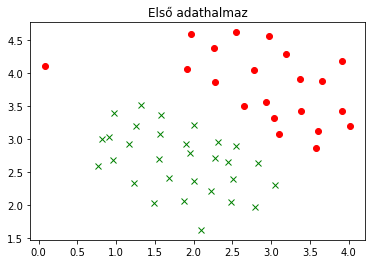

In [8]:
def dataSeparation(X,Y):
    CLR1 = []                                    # cluster1
    CLR2 = []                                    # cluster2
    
    for i in range(Y.shape[0]):
        if (Y[i] == 0):
            CLR1.append(X[i,:])
        elif (Y[i] == 1):
            CLR2.append(X[i,:])
            
    CLR1 = np.asmatrix(CLR1)
    CLR2 = np.asmatrix(CLR2)
    return CLR1, CLR2

CLR11,CLR12 = dataSeparation(X1,Y1)

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')
plt.title("Első adathalmaz")
plt.show()

Az adatainkat megfigyelve láthatjuk, hogy ez az adathalmaz lineárisan szeparálható. Használjuk az SVM modellt, melyhez minden szükséges algoritmust az sklearn csomag tartalmaz.

### 2: Lineáris SVM tanítása

Ehhez a feladathoz nem lesz szükségünk semmi extra kernelre (nem kell trükközni), így szimplán beállíthatjuk a kernel paraméternek a lineáris opciót.
A C paraméternek kezdetnek a 0.5 értéket választjuk. (a ravel() függvényről később beszélünk)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


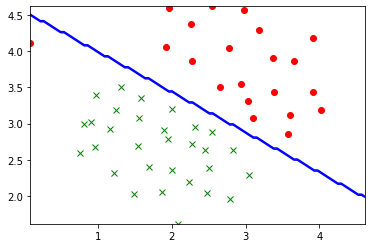

In [17]:
classifier = SVC(C=0.5,kernel="linear")
print(classifier)
classifier.fit(X1,Y1.ravel())

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X1[:,0].min(),X1[:,1].max(),num=100),np.linspace(X1[:,1].min(),X1[:,1].max(),num=100))
desBoundary1 = classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape)
plt.contour(X_1,X_2,desBoundary1,1,colors="b")
plt.show()

Láthatjuk, hogy 1 pont besorolása nem a megfelelő csoportba történt. Ez a pont ránézésre mérési hiba is lehet. Ha szeretnénk, hogy a megoldásunk ezt a kiugró pontot is megfelelően lekezelje hangoljuk a C paramétert.

### Tesztelés: C = 100

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


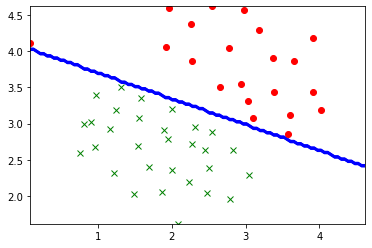

In [16]:
classifier2 = SVC(C=100,kernel="linear")
print(classifier2)
classifier2.fit(X1,Y1.ravel())

plt.plot(CLR11[:,0],CLR11[:,1],'gx')
plt.plot(CLR12[:,0],CLR12[:,1],'ro')

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X1[:,0].min(),X1[:,1].max(),num=100),np.linspace(X1[:,1].min(),X1[:,1].max(),num=100))
desBoundary2 = classifier2.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape)
plt.contour(X_1,X_2,desBoundary2,colors="b")
plt.show()

Láthatjuk, hogy a feladat így is megoldható, viszont a biztonsági sáv a két klaszter között jelentősen lecsökkent. Könnyen lehet, hogy túltanulás esete áll fenn. 

Názzük meg, hogyan lehet alkalmazni az SVM módszerét egy komplexebb adathalmaza.

### 3: Második adathalmaz betöltése és vizualizálása

(863, 2)
(863, 1)


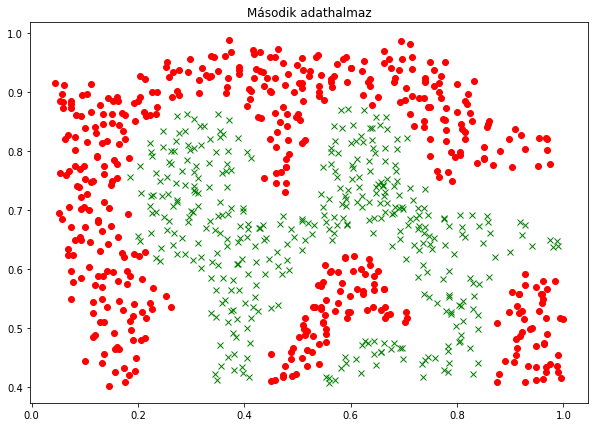

In [13]:
data = loadmat('Lab9data2.mat')
X2 = data["X"]
Y2 = data["y"]
print(X2.shape)
print(Y2.shape)

CLR21,CLR22 = dataSeparation(X2,Y2)

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title("Második adathalmaz")
plt.show()

Látható, hogy ez az adathalmaz nem lineárisan szeparálható. Kernelezésre lesz szükség.

### 4: Gauss kernel

Az sklearn csomag SVC függvényének kernel paraméterének az RBF kulcsszót megadva válaszhatjuk ki a Gauss gernelt (RBF = Radial basis function)

A ravel() függvénynek itt lesz szerpe, mivel a magasabb dimenzióba transzformálás során figyelni kell arra is, hogy az Y is a megfelelő dimenzióra bővüljön.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


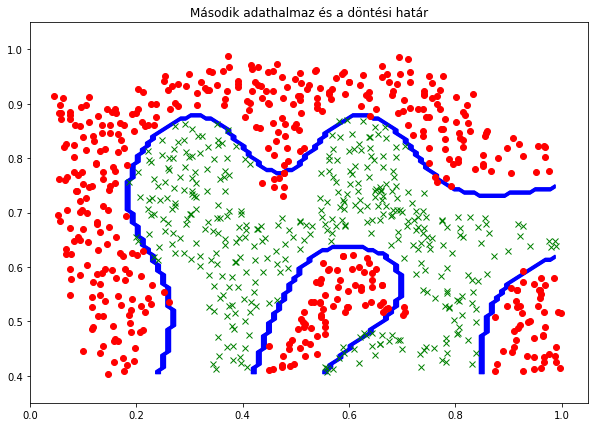

In [18]:
classifier3 = SVC(kernel = "rbf", gamma=30)
print(classifier3)
classifier3.fit(X2,Y2.ravel())

plt.figure(figsize=(10,7))
plt.plot(CLR21[:,0],CLR21[:,1],'gx')
plt.plot(CLR22[:,0],CLR22[:,1],'ro')
plt.title('Második adathalmaz és a döntési határ')

X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
desBoundary3 = classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape)

plt.contour(X_5,X_6,desBoundary3,colors = "b")
plt.xlim(0,1.05)
plt.ylim(0.35,1.05)
plt.show()

### 5: Harmadik adathalmaz vizualizálása

(211, 2)
(211, 1)


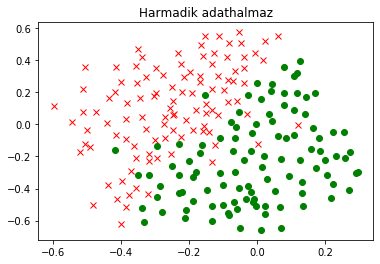

In [20]:
data = loadmat("Lab9data3.mat")
X3 = data["X"]
Y3 = data["y"]
Xval = data["Xval"]
Yval = data["yval"]
print(X3.shape)
print(Y3.shape)

CLR31,CLR32 = dataSeparation(X3,Y3)

plt.plot(CLR31[:,0],CLR31[:,1],"go")
plt.plot(CLR32[:,0],CLR32[:,1],"rx")
plt.title("Harmadik adathalmaz")
plt.show()


Ezen az adathalmazon a Paraméter hangolást fogjuk bemutatni néhány előr meghatározott C konstans értékkel.

### 6: Paraméter becslése néhány C értékével

In [21]:
def dataset3Params(X, y, Xval, yval,vals):
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, Y3.ravel(), Xval, Yval.ravel(),C_vals)
classifier4 = SVC(C=C,gamma=gamma)
print(classifier4)
classifier4.fit(X3,Y3.ravel())
print('Best values:\nC =',C,'\ngamma =',gamma)

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best values:
C = 0.3 
gamma = 100.0


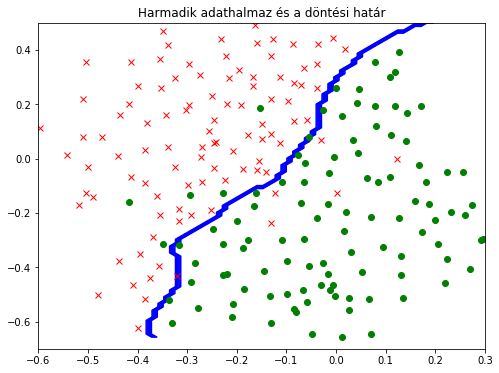

In [22]:
plt.figure(figsize=(8,6))
plt.plot(CLR31[:,0],CLR31[:,1],"go")
plt.plot(CLR32[:,0],CLR32[:,1],"rx")
plt.title("Harmadik adathalmaz és a döntési határ")

# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
desBoundary4 = classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape)
plt.contour(X_7,X_8,desBoundary4,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)
plt.show()